# Potato Disease Classification (A Deep Learning based Project)

Dataset Taken from:  https://www.kaggle.com/arjuntejaswi/plant-village

-> Checking if TensorFlow is installed or not, & if not, then instructing the system to install it

In [1]:
pip install tensorflow

# Importing all the relevant Dependencies

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Setting the constants to be used throughout the project

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

# Importing Data into TensorFlow dataset object

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
#If we want to print each individual image present in each class
#We get tensor here as output

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[ 90.  93. 102.]
  [ 98. 101. 110.]
  [121. 124. 133.]
  ...
  [133. 137. 148.]
  [135. 139. 150.]
  [137. 141. 152.]]

 [[108. 111. 120.]
  [ 88.  91. 100.]
  [ 97. 100. 109.]
  ...
  [133. 137. 148.]
  [135. 139. 150.]
  [137. 141. 152.]]

 [[100. 103. 112.]
  [112. 115. 124.]
  [117. 120. 129.]
  ...
  [135. 139. 150.]
  [135. 139. 150.]
  [137. 141. 152.]]

 ...

 [[ 51.  53.  68.]
  [ 65.  67.  82.]
  [ 83.  85. 100.]
  ...
  [101. 106. 126.]
  [102. 107. 127.]
  [100. 105. 125.]]

 [[ 86.  88. 101.]
  [141. 143. 156.]
  [115. 117. 130.]
  ...
  [109. 114. 134.]
  [110. 115. 135.]
  [106. 111. 131.]]

 [[102. 104. 117.]
  [ 83.  85.  98.]
  [ 78.  80.  93.]
  ...
  [118. 123. 143.]
  [119. 124. 144.]
  [114. 119. 139.]]], shape=(256, 256, 3), dtype=float32)


In [7]:
#And if we want to convert a tensor to a numpy

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

#& then we will see a 3D-Array, Every number is in between 0 to 255 (color of the image)

[[[184. 177. 184.]
  [184. 177. 184.]
  [184. 177. 184.]
  ...
  [152. 140. 144.]
  [160. 148. 152.]
  [125. 113. 117.]]

 [[188. 181. 188.]
  [187. 180. 187.]
  [187. 180. 187.]
  ...
  [128. 116. 120.]
  [114. 102. 106.]
  [134. 122. 126.]]

 [[189. 182. 189.]
  [188. 181. 188.]
  [187. 180. 187.]
  ...
  [152. 140. 144.]
  [120. 108. 112.]
  [150. 138. 142.]]

 ...

 [[192. 183. 186.]
  [193. 184. 187.]
  [193. 184. 187.]
  ...
  [157. 142. 147.]
  [133. 118. 123.]
  [144. 129. 134.]]

 [[194. 185. 188.]
  [194. 185. 188.]
  [193. 184. 187.]
  ...
  [130. 115. 120.]
  [143. 128. 133.]
  [150. 135. 140.]]

 [[196. 187. 190.]
  [195. 186. 189.]
  [194. 185. 188.]
  ...
  [165. 150. 155.]
  [150. 135. 140.]
  [152. 137. 142.]]]


#Loading Data into TF.Dataset phase ENDS HERE!

# Visualizing some of the images from our dataset using Matplot Library

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


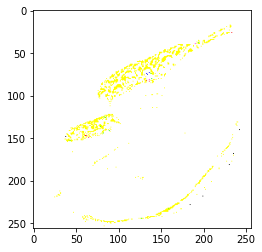

In [8]:
#Now, we will be visualizing the very first image

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())                      #Using Matplotlib

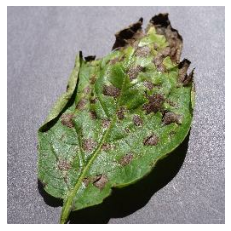

In [9]:
#It is a float datatype so we have to convert it to integer to make it look more good

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    
#Everytime, there will be a new image as it is shuffling

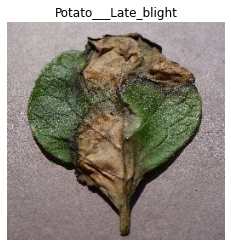

In [10]:
#If we want to display the label like what image is that or from which class it belongs to

for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

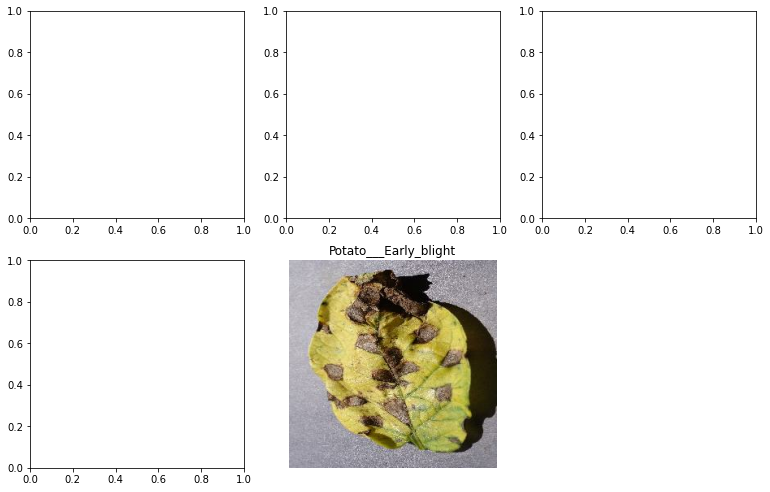

In [11]:
#If we want to display couple of more images

plt.figure(figsize=(13, 13))
for image_batch, label_batch in dataset.take(1):
    for i in range(5):
        ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

# Functions to Split Data

In [12]:
#What we are going to do here
#we will keep 80% of the total data => Training
#10% => Validation
#10% => Test

In [13]:
#Defining the epoch

EPOCHS=15

In [14]:
#Getting the split

train_size = 0.8      #because it is 80%
len(dataset)*train_size

54.400000000000006

In [15]:
#Taking first 54 samples

train_ds= dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)      #Skipping first 54 and getting remaining 54 samples
len(test_ds)

14

In [17]:
#Validation size is 10%

val_size=0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

# Cache, Shuffle, and Prefetch the Dataset

In [20]:
#Caching on the training data set we have
#Used to opitimize the dataset for training so our training will run fast

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Image Pre-Processing 

In [21]:
#IMAGE PRE-PROCESSING

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),  #Resizing the images here
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# Data Augmentation

In [22]:
#DATA AUGMENTATION

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building & Training using CNN

In [23]:
CHANNELS = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

#MODEL BUILDING

model = models.Sequential([
    
    #Hierarchical Layers in CNN
    
    resize_and_rescale,    #1st layer: resizing and rescaling
    data_augmentation,     #2nd layer: data augmentation
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),     #3rd layer: convolutional layer, 32 is trial
    layers.MaxPooling2D((2, 2)),     #4th layer: max pooling layer
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),     #64 is trial
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),      
    layers.Dense(64, activation='relu'),     #Flatten Layer
    layers.Dense(n_classes, activation='softmax'),     #Softmax activation function normalizes the probability of classes
])

model.build(input_shape=input_shape)

# Compiling the Model

In [24]:
#COMPILING THE MODEL

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
54/54 [==============================] - 176s 3s/step - loss: 0.9133 - accuracy: 0.4861 - val_loss: 0.8579 - val_accuracy: 0.4792
Epoch 2/15
54/54 [==============================] - 141s 3s/step - loss: 0.8269 - accuracy: 0.5729 - val_loss: 0.5972 - val_accuracy: 0.7240
Epoch 3/15
54/54 [==============================] - 144s 3s/step - loss: 0.5224 - accuracy: 0.7760 - val_loss: 0.3713 - val_accuracy: 0.8229
Epoch 4/15
54/54 [==============================] - 129s 2s/step - loss: 0.3146 - accuracy: 0.8704 - val_loss: 0.2178 - val_accuracy: 0.9062
Epoch 5/15
54/54 [==============================] - 145s 3s/step - loss: 0.3514 - accuracy: 0.8565 - val_loss: 0.2474 - val_accuracy: 0.8802
Epoch 6/15
54/54 [==============================] - 146s 3s/step - loss: 0.2613 - accuracy: 0.8993 - val_loss: 0.1970 - val_accuracy: 0.9427
Epoch 7/15
54/54 [==============================] - 132s 2s/step - loss: 0.2137 - accuracy: 0.9178 - val_loss: 0.1656 - val_accuracy: 0.9427
Epoch 8/15
54

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 576ms/step - loss: 0.0878 - accuracy: 0.9741


In [48]:
scores

[0.0601775236427784, 0.9698275923728943]

In [49]:
history

In [50]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
history.history['accuracy']

[0.9658564925193787,
 0.9832175970077515,
 0.984375,
 0.9774305820465088,
 0.9774305820465088,
 0.9768518805503845,
 0.9890046119689941,
 0.9675925970077515,
 0.9861111044883728,
 0.9907407164573669,
 0.9785879850387573,
 0.9878472089767456,
 0.9918981194496155,
 0.9849537014961243,
 0.9826388955116272]

In [53]:
len(history.history['accuracy'])

15

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the Accuracy  

Text(0.5, 1.0, 'Training and Validation Accuracy')

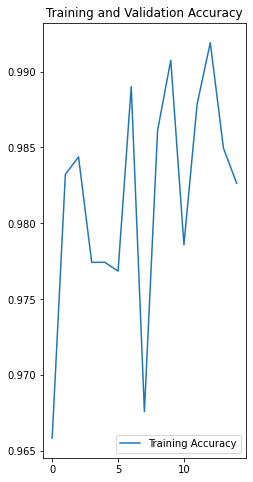

In [56]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting the Loss Curves

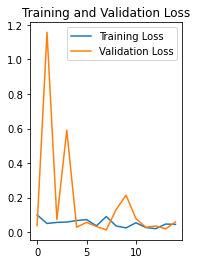

In [57]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Running prediction on a Sample Image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 822ms/step
predicted label: Potato___Early_blight


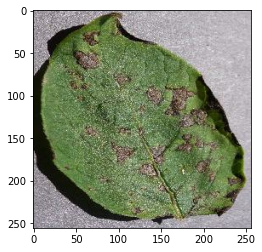

In [58]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Saving the Model

In [61]:
model_version=2
model.save(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/2\assets


INFO:tensorflow:Assets written to: ../Models/2\assets
